In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

Regression allows us to predict continuous variables, unlike classification. When it comes to regression one method is by far the most common: **ordinary least squares** or "**OLS**". This technique is so common and canonical that people will often refer to it simply as "regression", even though there are plenty of other techniques and types of models that qualify as regressions. In this lesson we'll cover least squares regression in depth.


## Simple linear regression

Ordinary least squares regression operates by finding estimators for coefficients in a formula that you define to explain the relationship between variables. Like the previous modeling example, you have a target variable and one or more input variables. To explain this further, let's use a simple example with two variables. This two-variable example with one input and one target is often called **simple linear regression**.

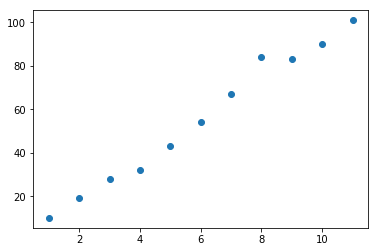

In [2]:
# Sample data to play with.
y = pd.DataFrame([10, 19, 28, 32, 43, 54, 67, 84, 83, 90, 101])
x = pd.DataFrame([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

plt.scatter(x, y)

When you look at that plot, it's easy to see a linear relationship between the two varibles. Even if you looked at it just by eye, it's easy to argue that it seems like for every 1 `x` increases, `y` increases by about 9 or 10.

That's great, and a useful estimate for yourself, but to _quantify_ the relationship exactly, we'll need to use regression. Regression requires you to give the model a functional form that it will use to estimate parameters. For this case with two variables and a linear relationship we can use the equation for a line:

$$y = \alpha + \beta x$$

Here, $\alpha$ is the y-intercept and $\beta$ is the slope of the line. To run a linear regression provide this equation, or functional form, and the model will estimate the parameters, in this case $\alpha$ and $\beta$. But how does the model come up with these estimates?

## Least squares

We previously talked about Naive Bayes. That model can be said to be learning through probabilities as it uses calculations of probabilities to create a prediction for your target variable. OLS learns through errors. What that means is, given the functional form that you pass into the model, OLS uses the estimators (in our example the estimates for $\alpha$ and $\beta$) that minimize the error.

That error, also called a residual, is by default the sum of the squared distances between each datapoint and the fit line, but could technically be any kind of distance measure you want to specify. The goal of this algorithm then is to minimize the sum of these squared residuals over all of the data points in the training set.

To think about it graphically, it minimizes the cumulative distance of all the points from the line.

## Your first regression

Let's see what a regression looks like in this example.

To generate a regression using scikit-learn, use the linear_model.LinearRegression class to establish the model, and then fit the model to your x and y variables.

The model class has a few attributes that we will want to see, and plenty of others that we'll go over later, though you can always refer to the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to see them all. Here we'll use the attributes for intercept and coefficient.

Coefficients: 
 [[ 9.38181818]]
Intercept: 
 [-0.74545455]


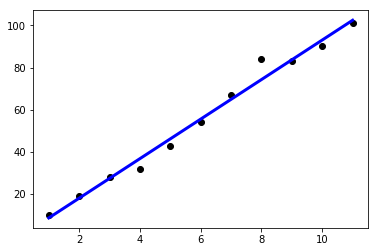

In [4]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

## Predicting with Simple Linear Regression

Let's review what we've actually done. The coefficient and the intercept correspond to the model's estimates for $\alpha$ and $\beta$ from the equation we initially specified. When they're estimates we usually specify that with a ^ above our variable, so our estimates are $\hat{\alpha}$ and $\hat{\beta}$. Our estimated equation is then:

$$ y = \hat{\alpha} + \hat{\beta}x = -.75 + 9.38x $$

To generate predictions with this trained model, then, the model will simply input the x-value you wish to predict from into the equation. For example, the prediction for `x = 12` would be: 

$$ y = -.75 + 9.38 * 12 = 111.84 $$

This is because your model has defined a linear relationship between the two variables. For each unit x increases, y will increase by 9.381. This is the beginning of a topic called explanatory power, which we'll cover further in a later assignment in this lesson and is one of the main benefits of least squares regression.

The one potential danger here is that the model assumes this relationship is valid for all values of x. So, technically speaking, it will return a result for input like `x = 102,830` even though that is way out of sample and probably no longer accurate. This is something to be cautious of when using this kind of model.